# Analysis of Gasoline Prices and Consumption  
### INFO 511 — Final Project  
**Project Title:** *The Impact of Gasoline Prices on U.S. Gasoline Consumption (1994–2024)*  
**Author:** Nikolas Lee-Bishop  
**Date:** October 2025  

---

### **Notebook Purpose**
This notebook conducts statistical and predictive analysis on the cleaned and merged dataset produced during the Exploratory Data Analysis (EDA) phase.  
The goal is to quantify and interpret the relationship between U.S. gasoline prices and gasoline consumption, and to determine whether higher prices lead to lower consumption when accounting for inflation and other factors.

---

### **Notebook Structure**
1. **Data Loading & Preparation**  
   - Import the cleaned `merged_gasoline_data.csv` from the EDA notebook.  
   - Perform any final preprocessing or transformations as needed.  

2. **Descriptive Analysis**  
   - Review key descriptive statistics and visual trends.  
   - Check for outliers, residual skewness, and normality after transformations.  

3. **Correlation & Relationship Analysis**  
   - Compute correlation coefficients between nominal price, real (inflation-adjusted) price, and consumption.  
   - Visualize correlations with scatter and heatmap plots.  

4. **Regression Modeling**  
   - Build and evaluate linear regression models:  
     - **Model 1:** Nominal Price → Consumption  
     - **Model 2:** Inflation-Adjusted Price → Consumption  
   - Assess statistical significance, R² values, and residuals.  

5. **Additional Analyses (Optional)**  
   - Perform rolling-window regression or trend decomposition.  
   - Test for seasonality or lagged effects using autocorrelation or time-series regression.  

6. **Conclusion & Interpretation**  
   - Summarize findings and discuss implications of price elasticity and consumption behavior.  

---

### **Data Source**
Dataset used in this notebook was produced from the EDA process and saved as:  
`data/merged_gasoline_data.csv`

---

Things to do:
- update header to keep accurate
  - include a brief summary of the EDA summary
- Summary
- Final walkthroughs

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

## 1. Data Loading and Transformation

In [2]:
merged_df = pd.read_pickle("../Analysis/MergedData/merged_gasoline_data.pkl")

print(merged_df.shape)

merged_df.head(15)
merged_df.tail(50)

(372, 6)


,Date,Nominal_Price_USD,Inflation_Adjusted_Price_USD,Gasoline_Consumption(Millions of Gallons),Year,Month
322,2020-11-01,2.200,2.668,10081.722,2020,November
323,2020-12-01,2.284,2.767,10227.756,2020,December
324,2021-01-01,2.420,2.920,10055.766,2021,January
325,2021-02-01,2.587,3.104,9200.520,2021,February
326,2021-03-01,2.898,3.453,11136.216,2021,March
327,2021-04-01,2.948,3.484,11137.602,2021,April
328,2021-05-01,3.076,3.606,11823.168,2021,May
329,2021-06-01,3.157,3.667,11795.700,2021,June
330,2021-07-01,3.231,3.735,12104.778,2021,July
331,2021-08-01,3.255,3.755,11955.384,2021,August


## 2. Feature Preparation

In [3]:
# --- Feature Selection ---
X = merged_df[["Inflation_Adjusted_Price_USD"]]   # independent variable
y = merged_df["Gasoline_Consumption(Millions of Gallons)"]   # dependent variable

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("✅ Data split into training and testing sets.")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

✅ Data split into training and testing sets.
Training samples: 279, Testing samples: 93


## 3. Fitting Simple Linear Regression

In [4]:
# --- Fit Linear Regression ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)

# --- Coefficients ---
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")

# --- Evaluation ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

Intercept: 9911.34
Slope: 386.04
R² Score: 0.140
RMSE: 704.38


## 4. Visualize Results

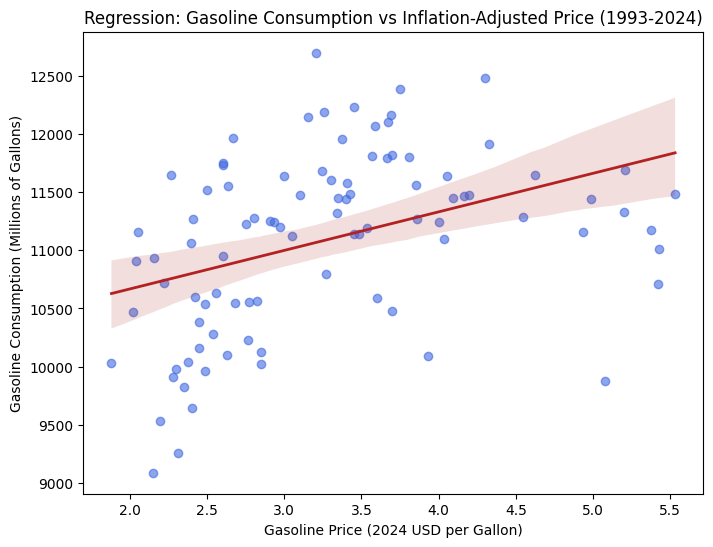

In [5]:
plt.figure(figsize=(8,6))
sns.regplot(
    x=X_test,
    y=y_test,
    scatter_kws={'alpha':0.6, 'color':"royalblue"},
    line_kws={'color':"firebrick", 'lw':2}
)
plt.title("Regression: Gasoline Consumption vs Inflation-Adjusted Price (1993-2024)")
plt.xlabel("Gasoline Price (2024 USD per Gallon)")
plt.ylabel("Gasoline Consumption (Millions of Gallons)")
plt.show()

# Testing a LOESS model

- ChatGPT copied and pasted in for now

In [6]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X = merged_df["Inflation_Adjusted_Price_USD"]
y = merged_df["Gasoline_Consumption(Millions of Gallons)"]

data = merged_df[["Inflation_Adjusted_Price_USD", "Gasoline_Consumption(Millions of Gallons)"]].dropna()
X = data["Inflation_Adjusted_Price_USD"]
y = data["Gasoline_Consumption(Millions of Gallons)"]

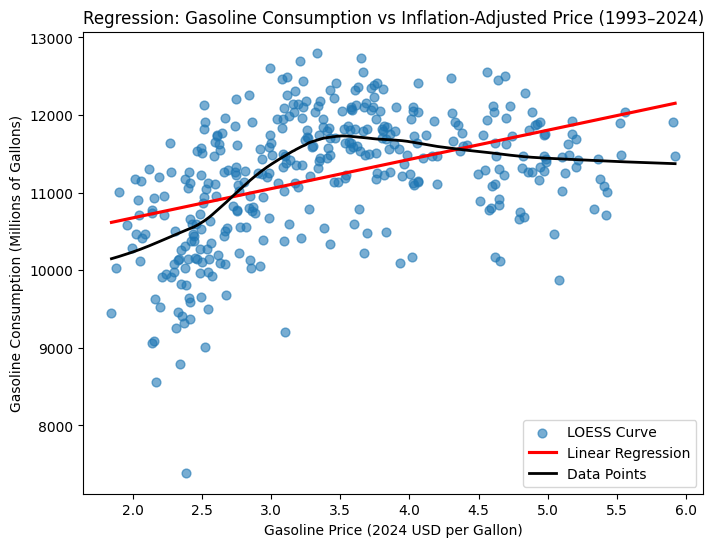

In [8]:
# Fit LOESS smoother (frac controls smoothness — try 0.3 to 0.6)
loess_smoothed = lowess(y, X, frac=0.4)

# Create plot
plt.figure(figsize=(8, 6))
sns.regplot(
    x=X,
    y=y,
    scatter_kws={"s": 40, "alpha": 0.6},
    line_kws={"color": "red"},
    ci=None
)

# Add LOESS curve
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color="black", linewidth=2, label="LOESS Curve")

plt.title("Regression: Gasoline Consumption vs Inflation-Adjusted Price (1993–2024)")
plt.xlabel("Gasoline Price (2024 USD per Gallon)")
plt.ylabel("Gasoline Consumption (Millions of Gallons)")
plt.legend(["LOESS Curve", "Linear Regression", "Data Points"])
plt.show()

In [9]:
import numpy as np

# Predicted values from LOESS
y_pred = loess_smoothed[:, 1]

# Interpolating to match the original X order
from numpy import interp
y_fit = interp(X, loess_smoothed[:, 0], loess_smoothed[:, 1])

# Compute pseudo R^2
ss_res = np.sum((y - y_fit)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2_loess = 1 - (ss_res / ss_tot)

print(f"Approximate LOESS R²: {r2_loess:.3f}")

Approximate LOESS R²: 0.383
